
🌦️ Average Weather by Disease:
                   Temperature  Humidity  Rainfall
DiseaseName                                      
Blight                  31.67     75.83      9.83
Fusarium Wilt           35.00     66.00      6.00
Leaf Curl               30.67     76.00      8.33
Leaf Spot               32.67     71.67     13.33
Mosaic Virus            32.33     70.33      8.00
Root Rot                34.00     68.67     13.67
Rust                    32.83     71.33     11.00
Wilt                    33.60     70.40      8.80
Yellowing Leaves        30.67     77.33      9.67

🧪 Pesticide Effectiveness by Crop:
            Effectiveness
CropType                
Groundnut          88.33
Rice               86.67
Tomato             81.67
Wheat              76.67
Potato             71.67
Cotton             70.83
Maize              66.67
Sugarcane          61.67
Barley             50.00

🔥 Top 3 Diseases by Region:
          Region       DiseaseName  Count
0      Bagalkot              Rust 

C:\Users\shekh\AppData\Local\Temp\ipykernel_16464\838628014.py:48: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  plt.tight_layout()
C:\Users\shekh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


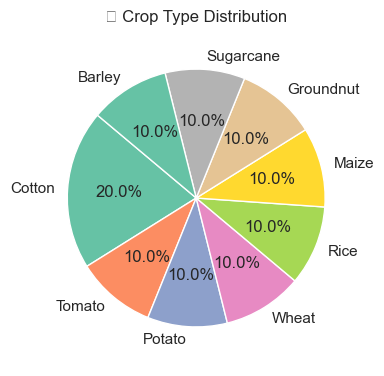

C:\Users\shekh\AppData\Local\Temp\ipykernel_16464\838628014.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="PesticideName", y="Effectiveness", estimator='mean', ci=None, palette="Blues_d")
C:\Users\shekh\AppData\Local\Temp\ipykernel_16464\838628014.py:57: UserWarning: Glyph 129524 (\N{LOTION BOTTLE}) missing from current font.
  plt.tight_layout()
C:\Users\shekh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129524 (\N{LOTION BOTTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


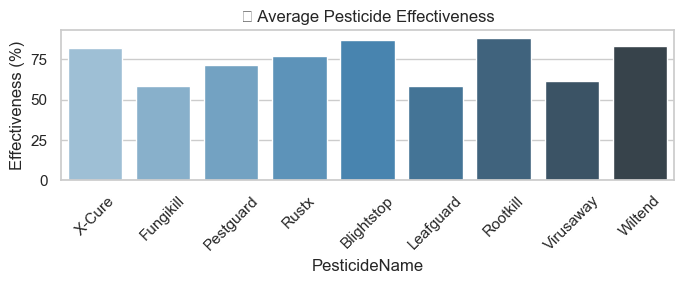

C:\Users\shekh\AppData\Local\Temp\ipykernel_16464\838628014.py:68: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\shekh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


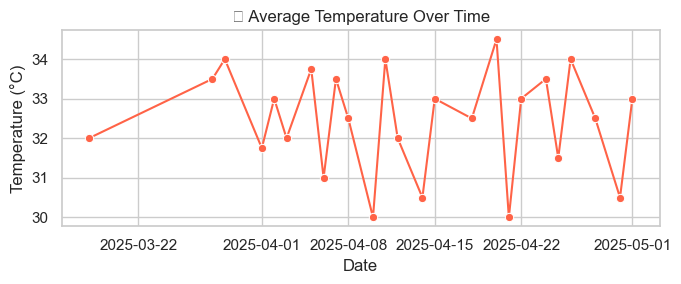

C:\Users\shekh\AppData\Local\Temp\ipykernel_16464\838628014.py:78: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\shekh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


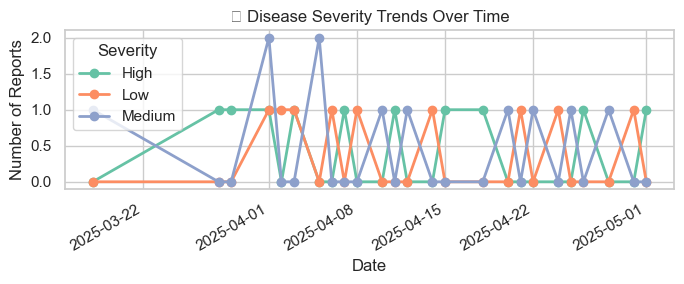

C:\Users\shekh\AppData\Local\Temp\ipykernel_16464\838628014.py:88: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
C:\Users\shekh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


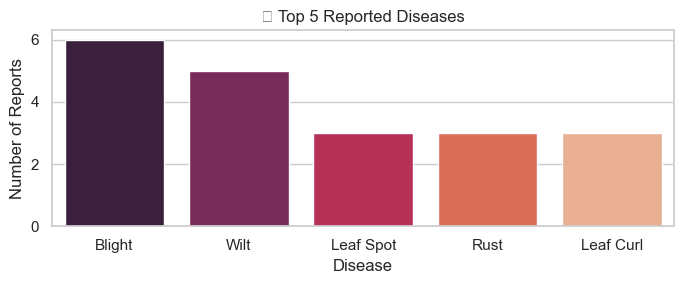

C:\Users\shekh\AppData\Local\Temp\ipykernel_16464\838628014.py:97: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  plt.tight_layout()
C:\Users\shekh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


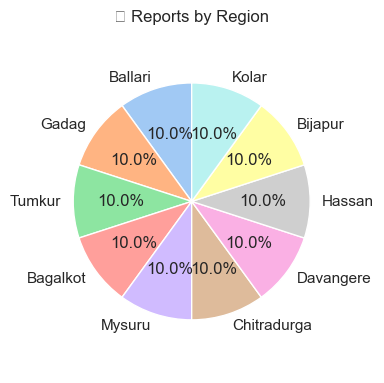

C:\Users\shekh\AppData\Local\Temp\ipykernel_16464\838628014.py:104: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  plt.tight_layout()
C:\Users\shekh\AppData\Local\Temp\ipykernel_16464\838628014.py:104: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\shekh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shekh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


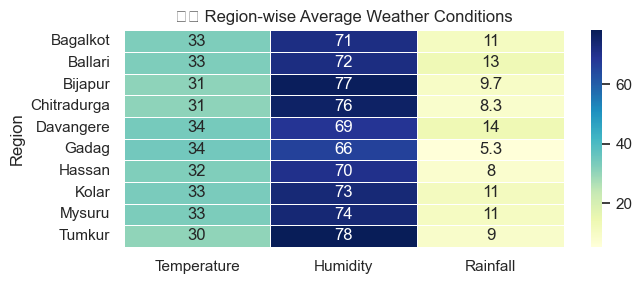

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Clean Data
df = pd.read_csv("AgroShield_Unified.csv")
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['DiseaseName'] = df['DiseaseName'].str.title().str.strip()
df['CropType'] = df['CropType'].str.title().str.strip()
df['Region'] = df['Region'].str.title().str.strip()
df['PesticideName'] = df['PesticideName'].str.title().str.strip()
df = df.drop_duplicates()



# 1. Average weather conditions by disease
weather_by_disease = df.groupby("DiseaseName")[["Temperature", "Humidity", "Rainfall"]].mean().round(2)
print("\n🌦️ Average Weather by Disease:\n", weather_by_disease)

# 2. Pesticide effectiveness by crop
pest_effect = df.groupby("CropType")[["Effectiveness"]].mean().sort_values("Effectiveness", ascending=False).round(2)
print("\n🧪 Pesticide Effectiveness by Crop:\n", pest_effect)

# 3. Top 3 diseases reported in each region
top_diseases = df.groupby(["Region", "DiseaseName"]).size().reset_index(name="Count")
top_3_per_region = top_diseases.sort_values(['Region', 'Count'], ascending=[True, False]).groupby("Region").head(5)
print("\n🔥 Top 3 Diseases by Region:\n", top_3_per_region)

# 4. Region-wise average weather
region_weather = df.groupby("Region")[["Temperature", "Humidity", "Rainfall"]].mean().round(2)
print("\n🏞️ Region-wise Average Weather Conditions:\n", region_weather)

# 5. Pesticide effectiveness by disease
pesticide_eff = df.groupby(["DiseaseName", "PesticideName"])["Effectiveness"].mean().reset_index()
print("\n🧴 Top 10 Pesticide Effectiveness by Disease:\n", pesticide_eff.sort_values("Effectiveness", ascending=False).head(10))



sns.set(style="whitegrid", palette="Set2")  # Aesthetic seaborn style

# 1. Crop Type Distribution
plt.figure(figsize=(4, 4))
crop_counts = df["CropType"].value_counts()
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("🌾 Crop Type Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Pesticide Effectiveness Bar Chart
plt.figure(figsize=(7, 3))
sns.barplot(data=df, x="PesticideName", y="Effectiveness", estimator='mean', ci=None, palette="Blues_d")
plt.title("🧴 Average Pesticide Effectiveness")
plt.xticks(rotation=45)
plt.ylabel("Effectiveness (%)")
plt.tight_layout()
plt.show()

# 3. Line Chart - Avg. Temperature Over Time
df_temp = df.groupby("Date")["Temperature"].mean().reset_index()
plt.figure(figsize=(7, 3))
sns.lineplot(data=df_temp, x="Date", y="Temperature", marker='o', color="tomato")
plt.title("📈 Average Temperature Over Time")
plt.ylabel("Temperature (°C)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Disease Severity Over Time
df_grouped = df.groupby("Date")["Severity"].value_counts().unstack().fillna(0)
df_grouped.plot(figsize=(7, 3), marker='o', linewidth=2)
plt.title("📉 Disease Severity Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reports")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Top 5 Reported Diseases
top_disease_counts = df["DiseaseName"].value_counts().head(5)
plt.figure(figsize=(7, 3))
sns.barplot(x=top_disease_counts.index, y=top_disease_counts.values, palette="rocket")
plt.title("🔥 Top 5 Reported Diseases")
plt.ylabel("Number of Reports")
plt.xlabel("Disease")
plt.tight_layout()
plt.show()

# 6. Regional Disease Distribution
plt.figure(figsize=(4, 4))
region_counts = df["Region"].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("📍 Reports by Region")
plt.axis('equal')
plt.tight_layout()
plt.show()

# 7. Heatmap - Region-wise Weather Conditions
plt.figure(figsize=(7, 3))
sns.heatmap(region_weather, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("🌡️ Region-wise Average Weather Conditions")
plt.tight_layout()
plt.show()